In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [33]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
prediction_fn = interpreter.get_signature_runner('serving_default')

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [34]:
print(input_details)
print(output_details)

[{'name': 'serving_default_inputs:0', 'index': 0, 'shape': array([  1, 543,   3], dtype=int32), 'shape_signature': array([ -1, 543,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 1672, 'shape': array([250], dtype=int32), 'shape_signature': array([250], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [35]:
pq_path = "data/2044/3127189.parquet"
ROWS_PER_FRAME = 543

In [39]:
data_columns = ['x', 'y', 'z']
data = pd.read_parquet(pq_path, columns=data_columns) # change the code 
print(data)
n_frames = int(len(data) / ROWS_PER_FRAME)
data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
print(data)
xyz = data.astype(np.float32)
print("xyz",xyz)    

              x         y         z
0      0.479847  0.478954 -0.044969
1      0.469082  0.439374 -0.069958
2      0.472504  0.453134 -0.040229
3      0.458673  0.407925 -0.045351
4      0.468096  0.428457 -0.072840
...         ...       ...       ...
11941  0.495532  0.678461 -0.031133
11942  0.556264  0.731370 -0.057106
11943  0.560891  0.688530 -0.055074
11944  0.537938  0.694569 -0.034128
11945  0.520333  0.711272 -0.015761

[11946 rows x 3 columns]
[[[ 0.47984743  0.47895426 -0.04496872]
  [ 0.46908179  0.43937427 -0.06995778]
  [ 0.47250366  0.45313424 -0.04022874]
  ...
  [ 0.36425799  0.58293712 -0.07529889]
  [ 0.35422423  0.60588181 -0.05386046]
  [ 0.32874256  0.6169728  -0.04170628]]

 [[ 0.47846076  0.47887966 -0.04504538]
  [ 0.4688136   0.43949652 -0.06977124]
  [ 0.47259629  0.45318964 -0.04024427]
  ...
  [ 0.38806677  0.57163179 -0.05851606]
  [ 0.37868175  0.59630364 -0.04475195]
  [ 0.35653877  0.60845238 -0.03735632]]

 [[ 0.47792172  0.47920623 -0.04546239]
  [ 0.

In [29]:
from multiprocessing import cpu_count
def read_json_file(file_path):
    """Read a JSON file and parse it into a Python object.

    Args:
        file_path (str): The path to the JSON file to read.

    Returns:
        dict: A dictionary object representing the JSON data.
        
    Raises:
        FileNotFoundError: If the specified file path does not exist.
        ValueError: If the specified file path does not contain valid JSON data.
    """
    try:
        # Open the file and load the JSON data into a Python object
        with open(file_path, 'r') as file:
            json_data = json.load(file)
        return json_data
    except FileNotFoundError:
        # Raise an error if the file path does not exist
        raise FileNotFoundError(f"File not found: {file_path}")
    except ValueError:
        # Raise an error if the file does not contain valid JSON data
        raise ValueError(f"Invalid JSON data in file: {file_path}")

cpu_count()

4

In [1]:
import os
import json
train_df = pd.read_csv('train.csv')
print("\n\n... LOAD SIGN TO PREDICTION INDEX MAP FROM JSON FILE ...\n")
s2p_map = {k.lower():v for k,v in read_json_file(os.path.join("sign_to_prediction_index_map.json")).items()}
p2s_map = {v:k for k,v in read_json_file(os.path.join("sign_to_prediction_index_map.json")).items()}
encoder = lambda x: s2p_map.get(x.lower())
decoder = lambda x: p2s_map.get(x)
# print(s2p_map)
train_df['label'] = train_df.sign.map(encoder)

NameError: name 'pd' is not defined

In [31]:

output = prediction_fn(inputs=xyz)
p = output['outputs'].reshape(-1)
print(p)
decoder(p.argmax())


[-8.86820793e-01  6.81655049e-01  9.37719643e-01  6.66603386e-01
 -4.61473018e-02  3.79723966e-01 -1.14137733e+00  9.99376476e-01
  1.71679929e-01  1.25748551e+00 -9.05560888e-03 -5.19064248e-01
 -1.50597262e+00 -5.48428535e-01 -1.36578274e+00 -5.57539940e-01
 -1.04789793e+00  2.34915629e-01 -3.73249382e-01 -9.08312798e-01
 -1.67654896e+00 -8.54372084e-01 -1.27558935e+00 -7.37284124e-01
  1.40889657e+00 -1.64499998e+00  1.11103572e-01 -6.17511749e-01
 -4.91352260e-01 -1.56341648e+00 -7.31140554e-01 -7.82747269e-01
 -8.09972659e-02 -5.32567799e-01 -8.34588647e-01  2.97168851e-01
 -1.01388074e-01  5.86076617e-01  6.99312806e-01  3.24538618e-01
 -2.72002131e-01  3.68671227e+00 -5.39129853e-01  2.15459913e-01
 -1.00367177e+00 -3.93847197e-01 -4.07405943e-01 -3.28699350e-01
 -5.63031316e-01  7.05047548e-01 -6.60112143e-01 -1.08669126e+00
  2.72267866e+00  2.18810415e+00 -2.19982195e+00  9.81597006e-02
  1.02145247e-01 -8.17297220e-01  1.64145172e-01 -1.09884191e+00
 -9.66374755e-01 -2.70656

'eye'

In [4]:
# get the data sample from  the data folder
# check each data's count of row

# show the distribution of the data's count of row 
import pandas as pd
# how many rows in the 2044/635217.parquet
def count_rows(pq_path):
    data = pd.read_parquet(pq_path)
    return len(data)

# iterate over the data folder and count the rows of each data
import os

data_folder = "data"
data_counts = {}
for folder in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder)
    if os.path.isdir(folder_path):
        data_counts[folder] = {}
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file.endswith(".parquet"):
                data_counts[folder][file] = count_rows(file_path)
print(data_counts)
# show the distributiuon of each count of the rows of parquet file





{'16069': {'2835702160.parquet': 11946, '1644386901.parquet': 6516, '2871431290.parquet': 12489, '4034100323.parquet': 10860, '4008403873.parquet': 36381, '3205824708.parquet': 88509, '3997960228.parquet': 14661, '3239836240.parquet': 4887, '3948366353.parquet': 10860, '4294675711.parquet': 9774, '4050310797.parquet': 47241, '1685090132.parquet': 5973, '3701422761.parquet': 3258, '1908460119.parquet': 22263, '580231765.parquet': 10860, '2786528893.parquet': 10317, '2163228652.parquet': 3258, '2977345301.parquet': 15747, '3695002084.parquet': 15204, '3156054446.parquet': 42897, '1355359316.parquet': 110772, '470582324.parquet': 12489, '2438433131.parquet': 14661, '3524809252.parquet': 29322, '2663125293.parquet': 6516, '2562990830.parquet': 3258, '38399290.parquet': 121632, '1066052878.parquet': 17919, '1488155102.parquet': 9774, '1170384158.parquet': 5430, '1624713580.parquet': 3258, '2386249283.parquet': 38010, '2943842860.parquet': 65160, '3586818570.parquet': 3258, '3277701106.parqu

Distribution of data_counts:
2835702160.parquet    11946
1644386901.parquet     6516
2871431290.parquet    12489
4034100323.parquet    10860
4008403873.parquet    36381
                      ...  
3783580238.parquet     3258
3563869202.parquet     7602
1034891803.parquet     7059
1866338335.parquet     6516
1571573761.parquet     9231
Length: 9658, dtype: int64

Minimum of data_counts:
1086

Maximum of data_counts:
291591

Mean of data_counts:
16462.43539034997

Median of data_counts:
9774.0

Upper quartile of data_counts:
15204.0

Lower quartile of data_counts:
5973.0



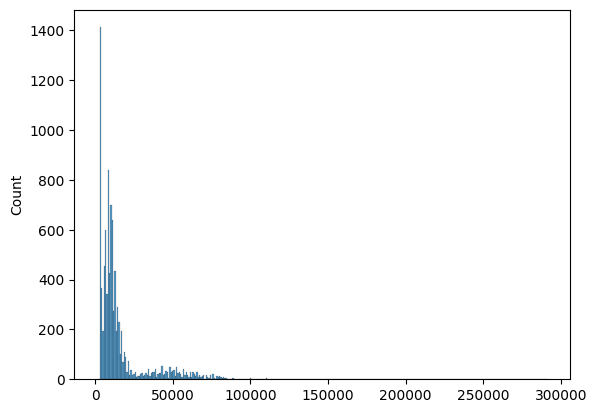

In [11]:
# get the distribution of the data_counts and plot it
import matplotlib.pyplot as plt
import seaborn as sns

data_counts_flat = {k: v for k, v in data_counts.items() for k, v in v.items()}
data_counts_flat = pd.Series(data_counts_flat)
sns.histplot(data_counts_flat)

# show the distribution of the data's count of row
# show the distribution of the data_counts and plot it
# does all the values of  data_counts have the greatest common divisor

# get the greatest common divisor of the data_counts
from math import gcd
from functools import reduce
data_counts_flat_gcd = reduce(gcd, data_counts_flat)

# Print the results
print("Distribution of data_counts:")
print(data_counts_flat)
print()

print("Minimum of data_counts:")
print(data_counts_flat.min())
print()

print("Maximum of data_counts:")
print(data_counts_flat.max())
print()

print("Mean of data_counts:")
print(data_counts_flat.mean())
print()

print("Median of data_counts:")
print(data_counts_flat.median())
print()

print("Upper quartile of data_counts:")
print(data_counts_flat.quantile(0.75))
print()

print("Lower quartile of data_counts:")
print(data_counts_flat.quantile(0.25))
print()
